## Лабораторная работа №1 | Вариант 5

Выполнил: Калиниченко Артём 

### 1. Numpy

In [73]:
import numpy as np 

1. Создайте единичную матрицу размером 3х3

In [74]:
mtrx = np.eye(3)
print(mtrx)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [75]:
custom_type = np.dtype([('R', np.uint8), ('G', np.uint8), ('B', np.uint8), ('A', np.uint8)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [76]:
import warnings
warnings.filterwarnings('ignore')

4. Создайте случайный вектор размера 10 и отсортируйте его

In [77]:
vec_int = np.random.randint(3, 27, size= 10)
vec_int = np.sort(vec_int)
print(vec_int)

[ 4  5  5  6  7 10 12 18 19 26]


5. Создайте read-only массив(неизменяемый)

In [78]:
read_only_array = np.random.randint(4, 56, size= 10)
read_only_array.flags.writeable = False
print(read_only_array)

try:
    read_only_array[0] = 555
except ValueError as e:
    print("You've made that array read only", e)

[44 52  5 37 48 51 11 20  4  9]
You've made that array read only assignment destination is read-only


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [79]:
coords = np.random.randint(3, 29, size=(10, 2))

x, y = coords[:, 0], coords[:, 1]

r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y, x)

polar_coords = np.column_stack((r, phi))
print(polar_coords)

[[26.90724809  0.83798123]
 [18.60107524  0.93804749]
 [33.9411255   0.78539816]
 [32.64965543  0.69865982]
 [15.26433752  1.01914134]
 [26.          1.17600521]
 [20.1246118   0.46364761]
 [25.49509757  0.72989966]
 [32.75667871  0.54565505]
 [22.84731932  1.16590454]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [80]:
arr = np.zeros((10, 10), [('x', float),('y', float)])


arr['x'], arr['y'] = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))

print(arr)

[[(0.        , 0.        ) (0.11111111, 0.        )
  (0.22222222, 0.        ) (0.33333333, 0.        )
  (0.44444444, 0.        ) (0.55555556, 0.        )
  (0.66666667, 0.        ) (0.77777778, 0.        )
  (0.88888889, 0.        ) (1.        , 0.        )]
 [(0.        , 0.11111111) (0.11111111, 0.11111111)
  (0.22222222, 0.11111111) (0.33333333, 0.11111111)
  (0.44444444, 0.11111111) (0.55555556, 0.11111111)
  (0.66666667, 0.11111111) (0.77777778, 0.11111111)
  (0.88888889, 0.11111111) (1.        , 0.11111111)]
 [(0.        , 0.22222222) (0.11111111, 0.22222222)
  (0.22222222, 0.22222222) (0.33333333, 0.22222222)
  (0.44444444, 0.22222222) (0.55555556, 0.22222222)
  (0.66666667, 0.22222222) (0.77777778, 0.22222222)
  (0.88888889, 0.22222222) (1.        , 0.22222222)]
 [(0.        , 0.33333333) (0.11111111, 0.33333333)
  (0.22222222, 0.33333333) (0.33333333, 0.33333333)
  (0.44444444, 0.33333333) (0.55555556, 0.33333333)
  (0.66666667, 0.33333333) (0.77777778, 0.33333333)
  (0.8888

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [81]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

c = np.ones((5, 5))

for i in range(len(x)):
    for j in range(len(y)):
        c[i][j] /= (x[i] - y[j])
print(c)

[[-5.18120449  1.25888318  2.46991822 -9.78766306  0.55156371]
 [-1.0917981  13.99777283 -3.14422653 -1.21199725  0.91733673]
 [ 1.08628452  0.52412843  0.65856797  0.9887236   0.34169324]
 [ 1.30745294  0.57070913  0.7338249   1.16865877  0.36089639]
 [-4.20178601  1.33446111  2.77868096 -6.79541006  0.56559855]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [82]:
arr = np.array([2.3, 4.5, 6.7, 7.8, 8.9], dtype= np.float32)
print(arr)
arr = arr.astype(np.int32)
print(arr)

[2.3 4.5 6.7 7.8 8.9]
[2 4 6 7 8]


10. Как случайно заменить p элементов в 2D массиве?

In [83]:
arr = np.ones((5, 5))

p, n = 10, 10

sz = arr.size

indexes = np.random.choice(sz, size= p, replace= False)

rows, cols = np.unravel_index(indexes, arr.shape)

arr[rows, cols] = n

print(arr)

[[10.  1. 10. 10.  1.]
 [10.  1.  1.  1.  1.]
 [ 1.  1. 10.  1. 10.]
 [10.  1.  1.  1. 10.]
 [10.  1.  1. 10.  1.]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [1]:
import pandas as pd

pd.set_option("display.precision", 2)

DATA_PATH = "data.csv"

df = pd.read_csv(DATA_PATH)

In [2]:
# Load dataset here
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


1. Узнайте сколько было на борту человек

In [3]:
number_of_passengers = df.shape[0]

print(number_of_passengers)

891


2. Какой медианный и средний возраста пассажиров

In [4]:
average_age = df["Age"].mean()
median_age = df["Age"].median()

print(average_age, median_age)

29.69911764705882 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [6]:
children = df[df["Age"] < 16]
total_childs = len(children)
alived_childs = children[children["Survived"] == 1].shape[0]

percent_alived_childs = alived_childs / total_childs * 100

adults = df[df["Age"] >= 16]
total_adults = len(adults)
alived_adults = adults[adults["Survived"] == 1].shape[0]

percent_alived_adults = alived_adults / total_adults * 100

print(percent_alived_childs, percent_alived_adults)

59.036144578313255 38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [9]:
women = df[(df["Sex"] == "female") & (df["Age"] >= 16)]
total_women = len(women)
alived_women = women[women["Survived"] == 1].shape[0]

percent_alived_women = alived_women / total_women * 100

men = df[(df["Sex"] == "male") & (df["Age"] >= 16)]
total_men = len(men)
alived_men = men[men["Survived"] == 1].shape[0]

percent_alived_men = alived_men / total_men * 100


print(percent_alived_women, percent_alived_childs, percent_alived_men)
print("Yes")


77.52293577981652 59.036144578313255 17.433414043583532
Yes


5. Зависит ли выживаемость от класса обслуживания?

In [11]:
f = df[df["Pclass"] == 1]
s = df[df["Pclass"] == 2]
t = df[df["Pclass"] == 3]

f_alived = f[f["Survived"] == 1].shape[0]
s_alived = s[s["Survived"] == 1].shape[0]
t_alived = t[t["Survived"] == 1].shape[0]

f_total = len(f)
s_total = len(s)
t_total = len(t)

percent_alived_f = f_alived / f_total
percent_alived_s = s_alived / s_total
percent_alived_t = t_alived / t_total

print(percent_alived_t, percent_alived_s, percent_alived_t)

print("Second class passengers are more alived")

0.24236252545824846 0.47282608695652173 0.24236252545824846
Second class passengers are more alived


6. Посчитайте средний возраст умерших женщин и мужчин

In [19]:
dead_women = df[(df["Sex"] == "female") & (df["Survived"] == 0)]
dead_men = df[(df["Sex"] == "male") & (df["Survived"] == 0)]

dead_women_total = dead_women["Age"].mean()
dead_men_total = dead_men["Age"].mean()


print(dead_women_total, dead_men_total)

25.046875 31.618055555555557


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [16]:
df.head()

without_relative = df[(df["SibSp"] == 0) & (df["Parch"] == 0)]

without_relative_total = without_relative.shape[0]
without_relative_alived = without_relative[without_relative["Survived"] == 1].shape[0]

percent_alived_without = without_relative_alived / without_relative_total

with_relative = df[(df["SibSp"] > 0) & (df["Parch"] > 0)]

with_relative_total = with_relative.shape[0]
with_relative_alived = with_relative[with_relative["Survived"] == 1].shape[0]

percent_alived_with = with_relative_alived / with_relative_total

print(percent_alived_with, percent_alived_without)

print("Yes that's the difference")

0.43661971830985913 0.30353817504655495
Yes that's the difference


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [17]:
alived = df[df["Survived"] == 1]
dead = df[df["Survived"] == 0]

alived_cost = alived["Fare"].mean()
dead_cost = dead["Fare"].mean()

print(alived_cost, dead_cost)
print("Yes, that's the difference")

48.39540760233918 22.117886885245902
Yes, that's the difference


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [20]:
s_alived = s[(s["Survived"] == 1)]
s_alived = s_alived["Age"]

print(s_alived.max(), s_alived.min())

62.0 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [35]:
max = int(men["Age"].max())

young_alived_men = df[(df["Sex"] == 'male') & (df["Age"] >= 18) & (df["Age"] <= 35)]

old_alived_men = df[(df["Sex"] == 'male') & (df["Age"] > 35)]

perc_old = len(old_alived_men[old_alived_men["Survived"] == 1]) / len(old_alived_men)
perc_young =  len(young_alived_men[young_alived_men["Survived"] == 1]) / len(young_alived_men)

print(perc_young, perc_old)
print('Среди более взрослых мужчин чуть больше процент выживших')

0.1752988047808765 0.18055555555555555
Среди более взрослых мужчин чуть больше процент выживших


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возрастов пассажиров

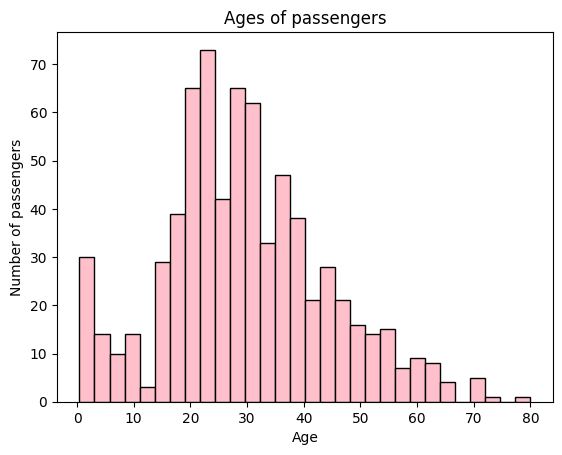

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mplcyberpunk
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

plt.hist(df['Age'], bins=30, color='pink', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Ages of passengers')
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

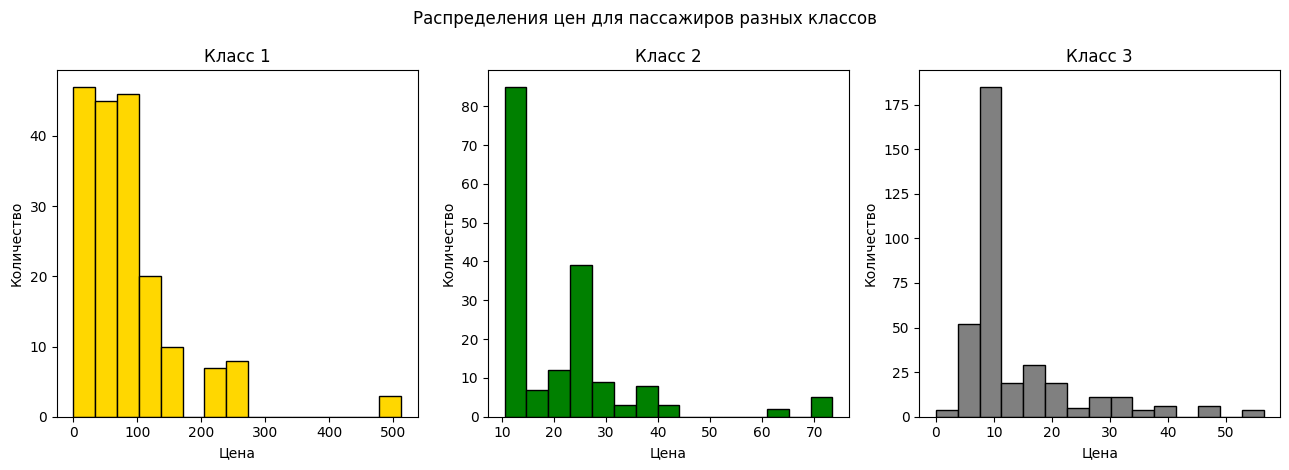

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

classes = sorted(df['Pclass'].unique())

colors = ['gold', 'green', 'gray']

plt.suptitle('Распределения цен для пассажиров разных классов')

for i, pclass in enumerate(classes):
    costs = df[df['Pclass'] == pclass]['Fare']
    
    axes[i].hist(costs, bins=15, edgecolor='black', color=colors[i])
    axes[i].set_title(f'Класс {pclass}')
    axes[i].set_xlabel('Цена')
    axes[i].set_ylabel('Количество')


plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


3. Постройте зависимость цены от возраста пассажира

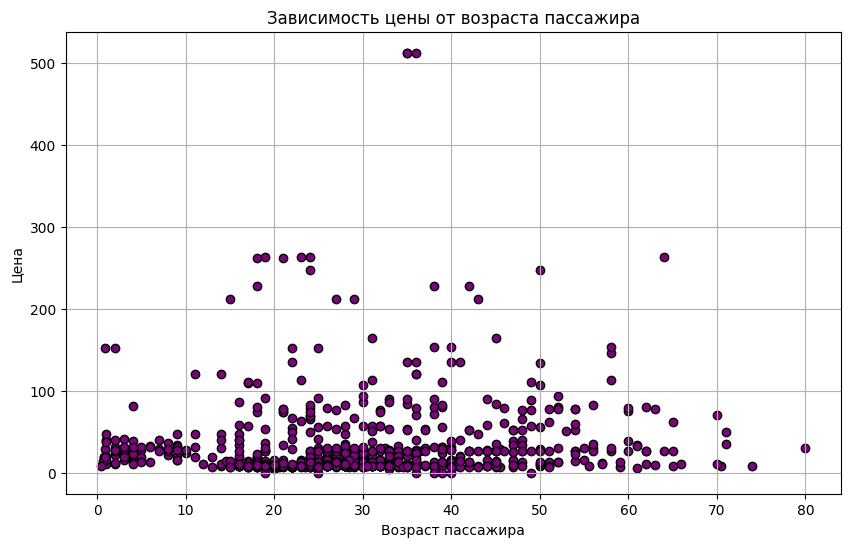

In [38]:
df = df.dropna(subset=['Age', 'Fare'])
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], color= 'purple', edgecolors='black')
plt.title('Зависимость цены от возраста пассажира')
plt.xlabel('Возраст пассажира')
plt.ylabel('Цена')
plt.grid(True)
plt.show()




4. Постройте box plot отображающий распределение цен на билеты в разных классах

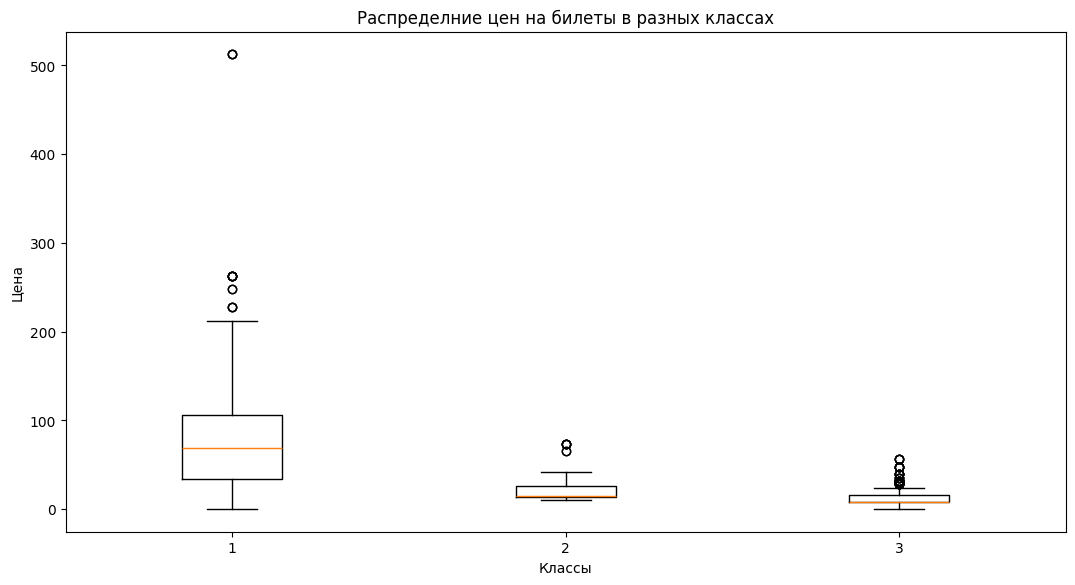

In [39]:
fig = plt.figure(figsize=(10, 5))

class1 = df[df["Pclass"] == 1]["Fare"]
class2 = df[df["Pclass"] == 2]["Fare"]
class3 = df[df["Pclass"] == 3]["Fare"]

ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot([class1, class2, class3])

plt.title('Распределние цен на билеты в разных классах')
plt.xlabel('Классы')
plt.ylabel('Цена')

plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

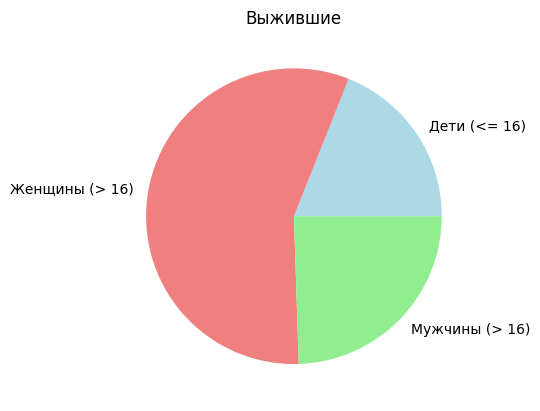

In [40]:
children = df[(df["Age"] <= 16) & (df["Survived"] == 1)]
women = df[(df["Sex"] == 'female') & (df["Age"] > 16) & (df["Survived"] == 1)]
men = df[(df["Sex"] == 'male') & (df["Age"] > 16) & (df["Survived"] == 1)]



plt.pie(
    [len(children), len(women), len(men)],
    labels= ['Дети (<= 16)', 'Женщины (> 16)', 'Мужчины (> 16)'],
    colors=['lightblue', 'lightcoral', 'lightgreen']
)

plt.title('Выжившие')
plt.show()

6. Сравните плотности распределения возрастов выживших и умерших пассажиров, сделайте выводы

Самая высокая выживаемость среди возрастной группы 20-40 лет


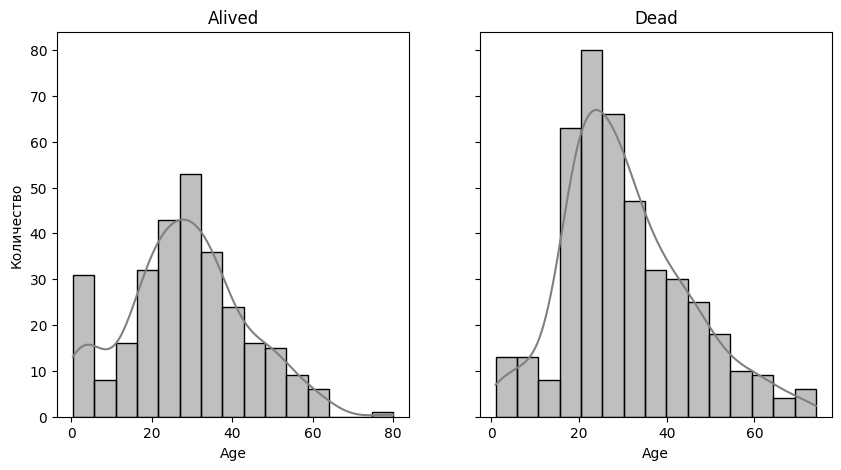

In [44]:
dead = df[df["Survived"] == 0]["Age"]
alived = df[df["Survived"] == 1]["Age"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
    
sns.histplot(alived, bins=15, kde=True, edgecolor='black', color='gray', ax = axes[0])
axes[0].set_title(f'Alived')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Количество')

sns.histplot(dead, bins=15, kde=True, edgecolor='black', color='gray', ax = axes[1])
axes[1].set_title(f'Dead')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Количество')

print("Самая высокая выживаемость среди возрастной группы 20-40 лет")



7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

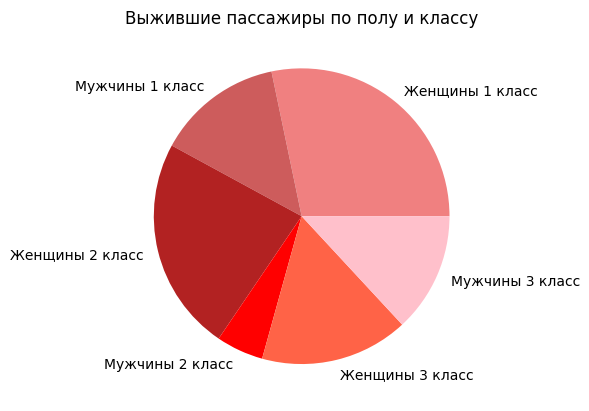

In [72]:
women = df[(df["Sex"] == 'female') & (df["Survived"] == 1)]
men = df[(df["Sex"] == 'male') & (df["Survived"] == 1)]

passengers = []

for i in range(1, 4):
    passengers.append(len(women[women["Pclass"] == i]))
    passengers.append(len(men[men["Pclass"] == i]))

# Цвета для классов и оттенки для женщин и мужчин
colors = ['lightcoral', 'indianred', 'firebrick', 'red', 'tomato', 'pink']

plt.pie(
    passengers,
    labels=['Женщины 1 класс', 'Мужчины 1 класс', 'Женщины 2 класс', 'Мужчины 2 класс', 
            'Женщины 3 класс', 'Мужчины 3 класс'],
    colors=colors,
)

plt.title('Выжившие пассажиры по полу и классу')
plt.show()